# A bit of fun with gravity waves

[Motion Clouds](https://neuralensemble.github.io/MotionClouds) were defined in the origin to provide a simple parameterization for 
textures. Thus we used a simple unimodal, normal distribution (on the log-radial frequency space to be more precise). But the larger set of Random Phase Textures may provide some interesting examples, some of them can even be fun! This is the case of this simulation of the waves you may observe on the surface on the ocean. 

In [1]:
from IPython.display import HTML
HTML('<center><video controls autoplay loop src="../files/2014-10-24_waves/waves.mp4" width=61.8%/></center>')

Main features of gravitational waves are:

1. longer waves travel faster (tsunami are fast and global, ripples are slow and local) - speed is *linearly proportional* to wavelength
2. phase speed (following a wave's crest) is **twice** as fast as group speed (following a group of waves).


More info about deep water waves : http://farside.ph.utexas.edu/teaching/336L/Fluidhtml/node122.html

<!-- TEASER_END -->

In [2]:
name = 'waves'
import os
import numpy as np
import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)

mc.figpath = '../files/2014-10-24_waves'
if not(os.path.isdir(mc.figpath)): os.mkdir(mc.figpath)

In [3]:
theta, B_theta, B_wave = 0., np.pi/16., .1
alpha, sf_0, B_sf, B_V = 2., .25, .3, 2.
seed = 1234565
V_X, V_Y, g = .5, 0., .1
loggabor=True

In [4]:
def envelope_gravity(fx, fy, ft, B_wave, g=.1):
    """
     Gravitational envelope:
     selects the plane corresponding to the speed (V_X, V_Y) with some thickness B_V

    """
    k = fx*V_X+fy*V_Y
    env = np.exp(-.5*(((ft/.5)**2-g*np.sqrt(((k/.5)**2)))**2/(B_wave*mc.frequency_radius(fx, fy, ft, clean_division=True))**2))
    env *= (ft*k) < 0
    return env

def envelope_gabor_wave(fx, fy, ft, B_wave, V_X=mc.V_X, V_Y=mc.V_Y,
                        B_V=mc.B_V, B_v=1., sf_0=mc.sf_0, B_sf=mc.B_sf, loggabor=mc.loggabor,
                        theta=mc.theta, B_theta=mc.B_theta, alpha=mc.alpha):
    """
    Returns the Motion Cloud kernel

    """
    envelope = mc.envelope_gabor(fx, fy, ft, V_X=V_X, V_Y=V_Y,
                                 B_V=B_V, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor,
                                 theta=theta, B_theta=B_theta, alpha=alpha)
    envelope *= envelope_gravity(fx, fy, ft, B_wave=B_wave)
    return envelope


In [5]:
B_v_low, B_v_high = .025, .1

In [6]:
name_ = name + '_low'
mc1 = envelope_gabor_wave(fx, fy, ft, V_X=1., V_Y=0., B_wave=B_v_low, B_V=B_V, theta=theta, B_theta=B_theta, sf_0=sf_0, B_sf=B_sf, alpha=alpha)
mc.figures(mc1, name_, seed=seed, figpath=mc.figpath)
mc.in_show_video(name_, figpath=mc.figpath)

/usr/local/lib/python3.6/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


In [7]:
name_ = name + '_high'
mc1 = envelope_gabor_wave(fx, fy, ft, V_X=1., V_Y=0., B_wave=B_v_high, B_V=B_V, theta=theta, B_theta=B_theta, sf_0=sf_0, B_sf=B_sf, alpha=alpha)
mc.figures(mc1, name_, seed=seed, figpath=mc.figpath)
mc.in_show_video(name_, figpath=mc.figpath)

This figure shows how one can create stimuli similar to MotionCloud stimuli that have a dstribution according to the laws of gravitational waves (that is with temporal frequency proportional to the square root of spatial frequency for deep water conditions -- in the shallow water conditions, normal MCs are a good approximation). Note that phase speed (following a maximum) is twice faster than group speed (following a dot). The two lines correspond to different bandwitdhs for the spread around the physical law (width of the manifold). 
<br>Columns represent isometric projections of a cube. The left column displays iso-surfaces of the spectral envelope by displaying enclosing volumes at 5 different energy values with respect to the peak amplitude of the Fourier spectrum. The middle column shows an isometric view of the faces of the movie cube. The first frame of the movie lies on the x-y plane, the x-t plane lies on the top face and motion direction is seen as diagonal lines on this face (vertical motion is similarly see in the y-t face). The third column displays the actual movie as an animation.

In [8]:
z = mc.rectif(mc.random_cloud(envelope_gabor_wave(fx, fy, ft, V_X=1., V_Y=0., B_wave=B_v_low, B_V=B_V, theta=theta, B_theta=B_theta, sf_0=sf_0, B_sf=B_sf, alpha=alpha)))

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html



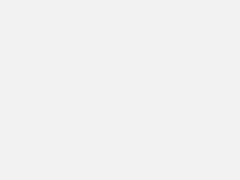

In [9]:
from moviepy.editor import VideoClip
import numpy as np
from vispy import app, scene
from vispy.gloo.util import _screenshot

canvas = scene.SceneCanvas(bgcolor=(.95, .95, .95, 1))#keys='interactive')
view = canvas.central_widget.add_view()
cam = scene.TurntableCamera(elevation=20, azimuth=205, up='z')
cam.fov = 42
cam.scale_factor = mc.N_X * .7
cam.set_range((0, mc.N_X), (0, mc.N_Y), (-mc.N_frame/4, mc.N_frame/4))
view.camera = cam

duration = 16.
Z = lambda t : z[ int(t/duration * mc.N_frame) ] * 42.
surface = scene.visuals.SurfacePlot(z=Z(0), shading='smooth', color=(0.2, 0.2, 1, 1))
view.add(surface)
canvas.show()

# ANIMATE WITH MOVIEPY
def make_frame(t):
    surface.set_data(z = Z(t)) # Update the surface
    canvas.on_draw(None) # Update the image on Vispy's canvas
    return _screenshot((0,0,canvas.size[0],canvas.size[1]))[:,:,:3]

import moviepy.editor as mpy

if False:
    fname = os.path.join(mc.figpath, name + '_small.gif')
    if not os.path.isfile(fname):
        animation = VideoClip(make_frame, duration=duration/2).resize(width=240)
        animation.speedx(0.5).write_gif(fname, fps=8, opt='nq')
    mpy.ipython_display(fname, loop=1, autoplay=1)

In [10]:
fname = os.path.join(mc.figpath, name + '.mp4')
if not os.path.isfile(fname):
    animation = VideoClip(make_frame, duration=duration).resize(width=920)
    animation.speedx(0.5).write_videofile(fname, fps=16)
mpy.ipython_display(fname, loop=1, autoplay=1)

## exploring different orientation bandwidths

In [11]:
for B_theta in (2*np.pi)*2.**-np.arange(7):
    name_ = name + '_B_theta_' + str(B_theta).replace('.', '_')
    mc_i = envelope_gabor_wave(fx, fy, ft, V_X=1., V_Y=0., B_V=B_V, B_wave=B_v_low, theta=theta, B_theta=B_theta, sf_0=sf_0, B_sf=B_sf, alpha=alpha)
    mc.figures(mc_i, name_, seed=seed, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

Here, we display these modified MotionClouds as the orientation bandwidth increases from pi/32 to 2*pi. This should be equivalent in the ocean to different dispersion of the wind that generates the waves. 
<br>Left column displays iso-surfaces of the spectral envelope by displaying enclosing volumes at 5 different energy values with respect to the peak amplitude of the Fourier spectrum. Right column of the table displays the actual movie as an animation.

### phase speed versus group speed

Let's now highlight the fact that phase speed (following a wave's crest) is twice the group speed (following a group of waves). This is quite easy to show mathematically and is directly linked to the polynomial factor guiding the shape of the speed plane.

Let's show the impulse response of the random phase texture (that is, its "texton"):

In [12]:
theta, B_theta, B_wave = 0., np.pi/8., .1
alpha, sf_0, B_sf, B_V = 1., .1, .3, 2.
seed = 1234565
V_X, V_Y, g = .5, 0., 2
loggabor=True

def envelope_gravity2(fx, fy, ft, V_X, V_Y, B_wave, g):
    k = fx*V_X+fy*V_Y
    env = np.exp(-.5*(((ft/.5)**2-g*np.sqrt(((k/.5)**2)))**2/(B_wave*mc.frequency_radius(fx, fy, ft, clean_division=True))**2))
    env *= (ft*k) < 0
    return env

def envelope_gabor_wave2(fx, fy, ft, V_X, V_Y, B_V, B_wave, sf_0, B_sf, theta, B_theta, alpha, g):
    envelope = mc.envelope_gabor(fx, fy, ft, V_X, V_Y, B_V, sf_0, B_sf, loggabor, theta, B_theta, alpha)
    envelope *= envelope_gravity2(fx, fy, ft, V_X, V_Y, B_wave, g)
    return envelope

In [13]:
mc_wave = envelope_gabor_wave2(fx, fy, ft, V_X, V_Y, B_V, B_wave, sf_0, B_sf, theta, B_theta, alpha, g)
mc.figures(mc_wave, 'waves_impulse', seed=seed, impulse=True, figpath=mc.figpath)
mc.in_show_video('waves_impulse', figpath=mc.figpath)
mc.figures(mc_wave, 'waves_mc', seed=seed, figpath=mc.figpath)
mc.in_show_video('waves_mc', figpath=mc.figpath)

Using a trick, one may "invert" the concavity such that we have the reverse effect, with the phase speed half the group speed:

In [14]:
trick = np.zeros((mc.N_X, mc.N_Y, mc.N_frame))
trick2 = np.zeros((mc.N_X, mc.N_Y, mc.N_frame))
trick[0:mc.N_Y//2, :, :] = mc_wave[mc.N_Y//2:, :, :]
trick[mc.N_Y//2:, :, :] = mc_wave[0:mc.N_Y//2, :, :]
trick2[:, :, 0:mc.N_Y//2] = trick[:, :, mc.N_Y//2:]
trick2[:, :, mc.N_Y//2:] = trick[:, :, 0:mc.N_Y//2]
mc.figures(trick2, 'waves_Timpulse', seed=seed, impulse=True, figpath=mc.figpath)
mc.in_show_video('waves_Timpulse', figpath=mc.figpath)
mc.figures(trick2, 'waves_T', seed=seed, figpath=mc.figpath)
mc.in_show_video('waves_T', figpath=mc.figpath)

TODO: Test with different concavities to see a different ratio between phase and group speed.